In [48]:

import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [49]:
ds = pd.read_csv('WMT.csv')
print(ds.head())

         Date      Open      High       Low     Close  Adj Close   Volume
0  25-08-1972  0.063477  0.064697       NaN  0.064453   0.036447  2508800
1  28-08-1972  0.064453  0.064941       NaN  0.064209   0.036309   972800
2  29-08-1972  0.063965  0.063965  0.063477  0.063477   0.035895  1945600
3  30-08-1972  0.063477  0.063477  0.062988  0.063477   0.035895   409600
4  31-08-1972  0.062988  0.062988  0.062500  0.062500   0.035343   870400


In [50]:
ds.drop('Adj Close',axis=1,inplace=True)
ds.drop('Date',axis=1,inplace=True)
print(ds.head())

       Open      High       Low     Close   Volume
0  0.063477  0.064697       NaN  0.064453  2508800
1  0.064453  0.064941       NaN  0.064209   972800
2  0.063965  0.063965  0.063477  0.063477  1945600
3  0.063477  0.063477  0.062988  0.063477   409600
4  0.062988  0.062988  0.062500  0.062500   870400


In [51]:
ds.isnull().sum()

Open      0
High      0
Low       2
Close     0
Volume    0
dtype: int64

In [52]:
ds.isna().sum()

Open      0
High      0
Low       2
Close     0
Volume    0
dtype: int64

In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
X = imputer.fit_transform(ds)

ds = pd.DataFrame(X, columns=ds.columns)
print(ds.head())

ds.isna().sum()

       Open      High        Low     Close     Volume
0  0.063477  0.064697  35.690486  0.064453  2508800.0
1  0.064453  0.064941  35.690486  0.064209   972800.0
2  0.063965  0.063965   0.063477  0.063477  1945600.0
3  0.063477  0.063477   0.062988  0.063477   409600.0
4  0.062988  0.062988   0.062500  0.062500   870400.0


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:>

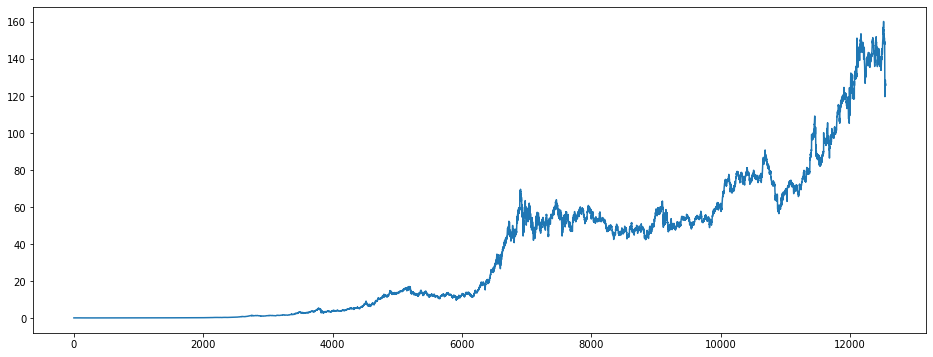

In [54]:
ds['Open'].plot(figsize=(16,6))

In [55]:
x=ds[['Open','High','Low','Volume']]
y=ds['Close']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(3139, 4)
(9414, 4)
(9414,)
(3139,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [58]:
regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
print(regressor.coef_)
print(regressor.intercept_)

predicted=regressor.predict(x_test)
print(x_test)

scoree = regressor.score(x_test,y_test)

print(scoree)

dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,"Predicted":predicted})
print(dfr)

[-2.36104254e-01  9.17355376e-01  3.14278303e-01 -1.07468481e-08]
0.04229472637310039
             Open        High         Low      Volume
9257    50.669998   51.380001   49.950001  19648700.0
7297    53.840000   53.849998   52.939999   8785400.0
12242  134.740005  134.750000  132.820007   8357300.0
5420    13.500000   13.687500   13.375000   5195800.0
10719   84.629997   84.720001   83.519997   6808400.0
...           ...         ...         ...         ...
551      0.024902    0.024902    0.024414   2406400.0
7587    54.500000   55.250000   54.000000   5999800.0
11107   71.889999   72.320000   71.709999   9661200.0
2648     0.742188    0.750000    0.734375   6912000.0
2217     0.294922    0.298828    0.292969   2022400.0

[3139 rows x 4 columns]
0.9999196784407923
           Actual   Predicted
9257    50.459999   50.699653
7297    53.349998   53.273505
12242  133.429993  133.495875
5420    13.500000   13.558823
10719   83.570000   83.954495
...           ...         ...
551      0.0

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
regressor.score(x_test,y_test)

import math
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error : ',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error :  0.18611623297508587
Mean Squared Error :  0.11194024026732219
Root Mean Squared Error :  0.3345747155230386


<AxesSubplot:>

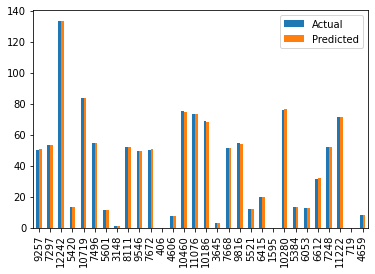

In [61]:
graph=dfr.head(30)
graph.plot(kind='bar')

In [62]:
open1=121.239998
high=122.949898
low=120.877403
volume=6715558
close=(-0.555904704*open1)+(0.818039776*high)+(0.737157283*low)-(0.00000000210762759*volume)+0.019275
print("Predicted stock price is : ",close)

Predicted stock price is :  122.29080089424525
